In [2]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epsilon = 0.9

rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


[[4.32721654e-01 1.56125879e-02 1.33256426e-02 1.64456877e-02]
 [3.77100215e-03 1.64381052e-03 4.76777339e-03 2.38806887e-01]
 [8.62375611e-03 2.24402085e-01 7.29379147e-03 8.62929463e-03]
 [4.20473238e-03 6.62083431e-03 2.94970709e-03 1.01417814e-01]
 [6.30949021e-01 4.01948052e-03 3.63602125e-03 1.11319231e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.96296348e-02 1.12440278e-04 1.90965871e-04 2.07001050e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.38387060e-03 7.96405285e-03 1.04163274e-02 8.02900685e-01]
 [3.62210800e-03 8.01176623e-01 4.63575012e-03 7.60668644e-03]
 [2.38439898e-01 2.70356977e-03 2.27104402e-03 1.57516349e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00578831e-04 5.77249039e-03 7.89251402e-01 3.33445210e-02]
 [7.21416430e-02 9.99549581e-01 1.55595979e-01 1.77024362e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

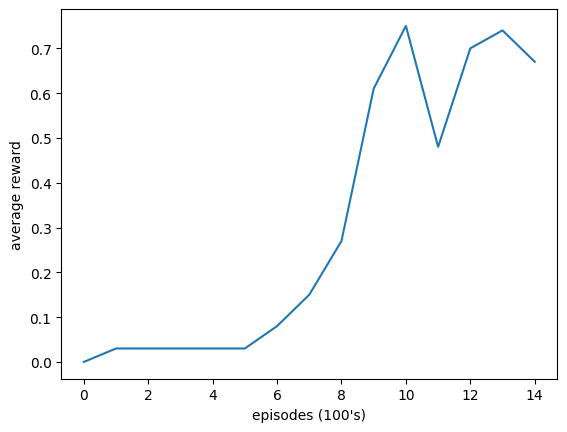

In [3]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()